In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
fema_claims_xl = pd.ExcelFile("Data/Yearly Paid Claims_FEMA.xlsx")
fema_funding_xl = pd.ExcelFile("Data/Yearly FEMA funding.xlsx")
disasterinci = pd.ExcelFile("Data/FEMA_Disaster incidents.xlsx")
precip_df = pd.read_csv("Data/heavy_precip.csv")
temp_data = pd.read_csv("Temperature Anomolies/Resources/Temperature_fig-1.csv")
disasterdec = pd.ExcelFile("Data/FEMA_Disaster Declarations.xlsx")

In [3]:
#The total number of claims closed with payment for the given year.
#The total dollar amount paid (in billions) on closed claims for the given year.
nfip_pd = fema_claims_xl.parse("NFIP")
nfip_df = nfip_pd.groupby(["Year"]).sum()
nfip_df.reset_index(level=0, inplace=True)
#nfip = nfip_df[(nfip_df["Year"] >= 1996) & (nfip_df["Year"] <= 2015)]
nfip = nfip_df.rename(columns = {'NumberOfClaimsClosedWithPayment':'Number of Claims Closed'})
nfip = nfip.rename(columns = {'TotalPaid':'Total Paid on Closed Claims'})
nfip['Total Paid on Closed Claims'] = nfip['Total Paid on Closed Claims']/1000000000
nfip.head()

,Year,Number of Claims Closed,Total Paid on Closed Claims
0,1996.0,46849.0,0.635417
1,1997.0,27063.0,0.414132
2,1998.0,52074.0,0.706868
3,1999.0,43385.0,0.563194
4,2000.0,14718.0,0.180638


In [4]:
#The number of Flooding Episdoes for the Year.
noaa_df = fema_claims_xl.parse("NOAA")
noaa_pd = noaa_df.groupby(["Year"]).sum()
noaa_pd.pop("Lat")
noaa_pd.pop("Lon")
noaa = noaa_pd.rename(columns = {'NumEpisodes':'Flooding Episodes'})
noaa.reset_index(level=0, inplace=True)
noaa.head()

,Year,Flooding Episodes
0,1996.0,5633
1,1997.0,4658
2,1998.0,5461
3,1999.0,3873
4,2000.0,3536


In [5]:
#FEMA Funding in billions of Real 2010 Dollars
fema_funding = fema_funding_xl.parse("Data Source-CRS Report")
fema_funding.head()

,Year,Administration Request,Enacted Appropriation,Emergency Supplemental,Total Enacted
0,2000,3.521,3.521,0.000,3.521
1,2001,3.584,1.964,0.000,1.964
2,2002,1.660,0.805,0.000,0.805
3,2003,2.185,0.948,1.690,2.638
4,2004,2.258,2.078,2.555,4.633


In [6]:
#Extreme One-Day Precipitation Events:  
#percentage of the land area of the contiguous 48 states where a much greater than normal portion 
#of total annual precipitation has come from extreme single-day precipitation events.
precip = precip_df[(precip_df['Year'] >= 1996) & (precip_df['Year'] <= 2015)]
precip.pop("9-year moving average")
precip.head()

,Year,Index value
86,1996,0.203
87,1997,0.112
88,1998,0.206
89,1999,0.153
90,2000,0.092


In [7]:
#Number of disaster incidents by year
d_incidents = disasterinci.parse("FEMA Declarations")
dis_inci = d_incidents[["Year", "Incident Type"]]
incidents_count = dis_inci.groupby(["Year"]).count()
incidents_count.reset_index(level=0, inplace=True)
incidents_count = incidents_count.rename(columns = {"Incident Type":'Number of Disasters Incidents'})
incidents_count.head()

,Year,Number of Disasters Incidents
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16


In [8]:
#Temperature data: annual average temperatures in the contiguous 48 states have changed since 1901
bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decades = [1900,1910,1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
temp_data["Decade"] = pd.cut(temp_data["Year"], bins, labels=decades)
temp_data = temp_data[["Year", "Earth's surface"]]
temp_data = temp_data.rename(columns = {"Earth's surface":'Temperature anomaly'})
temp_data.head()

,Year,Temperature anomaly
0,1901,-0.15
1,1902,-0.43
2,1903,-1.40
3,1904,-0.86
4,1905,-1.02


In [9]:
temp_1996_2015_data = temp_data[(temp_data["Year"] >= 1996) & (temp_data["Year"] <= 2015)]
temp_1996_2015_data

,Year,Temperature anomaly
95,1996,-0.13
96,1997,0.18
97,1998,2.21
98,1999,1.86
99,2000,1.25
100,2001,1.68
101,2002,1.19
102,2003,1.24
103,2004,1.08
104,2005,1.62


In [10]:
#Number of disaster declarations per year
fema_declarations = disasterdec.parse("FEMA Declarations")
fema_declarations['year'] = fema_declarations['Declaration Date'].dt.year
declaration_year = fema_declarations.groupby(["year"]).count()
declaration_year.reset_index(level=0, inplace=True)
disaster_declaration = declaration_year[["year", "Incident Type"]]
disaster_declaration = disaster_declaration.rename(columns = {"Incident Type":'Number of Disaster Declarations'})
disaster_declaration.head()

,year,Number of Disaster Declarations
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16


In [11]:
incident_types = fema_declarations["Incident Type"].value_counts()
incident_types

Severe Storm(s)     15963
Hurricane            9727
Flood                9496
Snow                 3620
Fire                 2656
Severe Ice Storm     1990
Tornado              1430
Drought              1292
Coastal Storm         462
Freezing              301
Other                 297
Typhoon               119
Earthquake            105
Volcano                50
Fishing Losses         42
Mud/Landslide          10
Toxic Substances        9
Chemical                9
Tsunami                 9
Dam/Levee Break         6
Human Cause             6
Terrorist               5
Name: Incident Type, dtype: int64

In [12]:
incident_types = pd.DataFrame(incident_types)
incident_types = incident_types.rename(columns = {"" : "Disaster Type", "Incident Type": "Number of Disasters"})
incident_types
#Would like to add a column name to the first column.

,Number of Disasters
Severe Storm(s),15963
Hurricane,9727
Flood,9496
Snow,3620
Fire,2656
Severe Ice Storm,1990
Tornado,1430
Drought,1292
Coastal Storm,462
Freezing,301


In [13]:
fema_declarations_1996_2015 = fema_declarations[(fema_declarations['year'] >= 1996) & (fema_declarations['year'] <= 2015)]
fema_declarations_1996_2015

,Disaster Number,IH Program Declared,IA Program Declared,PA Program Declared,HM Program Declared,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date,Disaster Close Out Date,Place Code,Declared County/Area,year
2661,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99003.0,Alfalfa (County),2015
2662,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99009.0,Beckham (County),2015
2663,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99011.0,Blaine (County),2015
2664,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99013.0,Bryan (County),2015
2665,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99015.0,Caddo (County),2015
2666,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99017.0,Canadian (County),2015
2667,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99039.0,Custer (County),2015
2668,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99043.0,Dewey (County),2015
2669,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99045.0,Ellis (County),2015
2670,4247,No,No,Yes,Yes,OK,2015-12-29 18:00:00,DR,Severe Ice Storm,SEVERE WINTER STORMS AND FLOODING,2015-11-27 00:00:00,2015-11-29 00:00:00,NaT,99047.0,Garfield (County),2015


In [60]:
incident_types_1996_2015 = fema_declarations_1996_2015["Incident Type"].value_counts()
incident_types_1996_2015

Severe Storm(s)     13225
Hurricane            7660
Fire                 2583
Flood                2509
Snow                 1961
Severe Ice Storm     1820
Coastal Storm         379
Other                 287
Tornado               280
Freezing               85
Earthquake             63
Typhoon                40
Drought                29
Tsunami                 9
Chemical                9
Mud/Landslide           7
Terrorist               5
Dam/Levee Break         1
Volcano                 1
Name: Incident Type, dtype: int64

In [61]:
incident_types_1996_2015 = pd.DataFrame(incident_types_1996_2015)
incident_types_1996_2015

,Incident Type
Severe Storm(s),13225
Hurricane,7660
Fire,2583
Flood,2509
Snow,1961
Severe Ice Storm,1820
Coastal Storm,379
Other,287
Tornado,280
Freezing,85


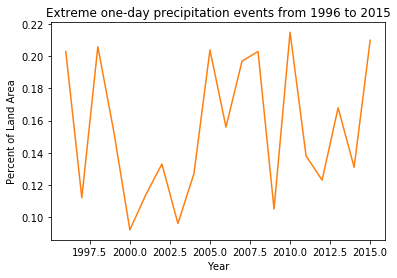

In [47]:
#Extreme one-day precipitation events from 1996 to 2015.

plt.plot(precip["Year"],precip["Index value"])
plt.title("Extreme one-day precipitation events from 1996 to 2015")
plt.xlabel("Year")
plt.ylabel("Percent of Land Area")
plt.show()

In [48]:
precip_df
precip_df

,Year,Index value,9-year moving average
0,1910,0.078,0.097941
1,1911,0.148,0.108855
2,1912,0.116,0.115871
3,1913,0.082,0.120289
4,1914,0.167,0.121539
5,1915,0.125,0.114590
6,1916,0.101,0.100402
7,1917,0.052,0.089473
8,1918,0.078,0.089270
9,1919,0.125,0.095992


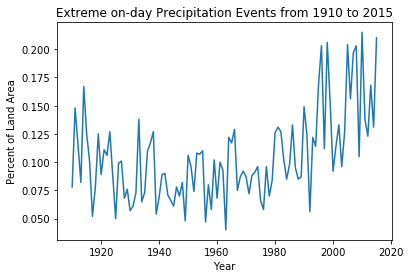

In [27]:
#Extreme one-day precipitation events from 1910 to 2015.

plt.plot(precip_df["Year"],precip_df["Index value"])
plt.title("Extreme on-day Precipitation Events from 1910 to 2015")
plt.xlabel("Year")
plt.ylabel("Percent of Land Area")
plt.show()

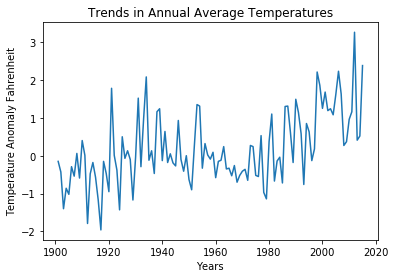

In [38]:
plt.plot(temp_data["Year"], temp_data["Temperature anomaly"])
plt.title("Trends in Annual Average Temperatures")
plt.xlabel("Years")
plt.ylabel("Temperature Anomaly Fahrenheit")
plt.show()

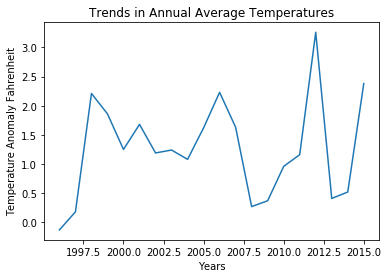

In [40]:
plt.plot(temp_1996_2015_data["Year"],temp_1996_2015_data["Temperature anomaly"])
plt.title("Trends in Annual Average Temperatures")
plt.xlabel("Years")
plt.ylabel("Temperature Anomaly Fahrenheit")
plt.show()

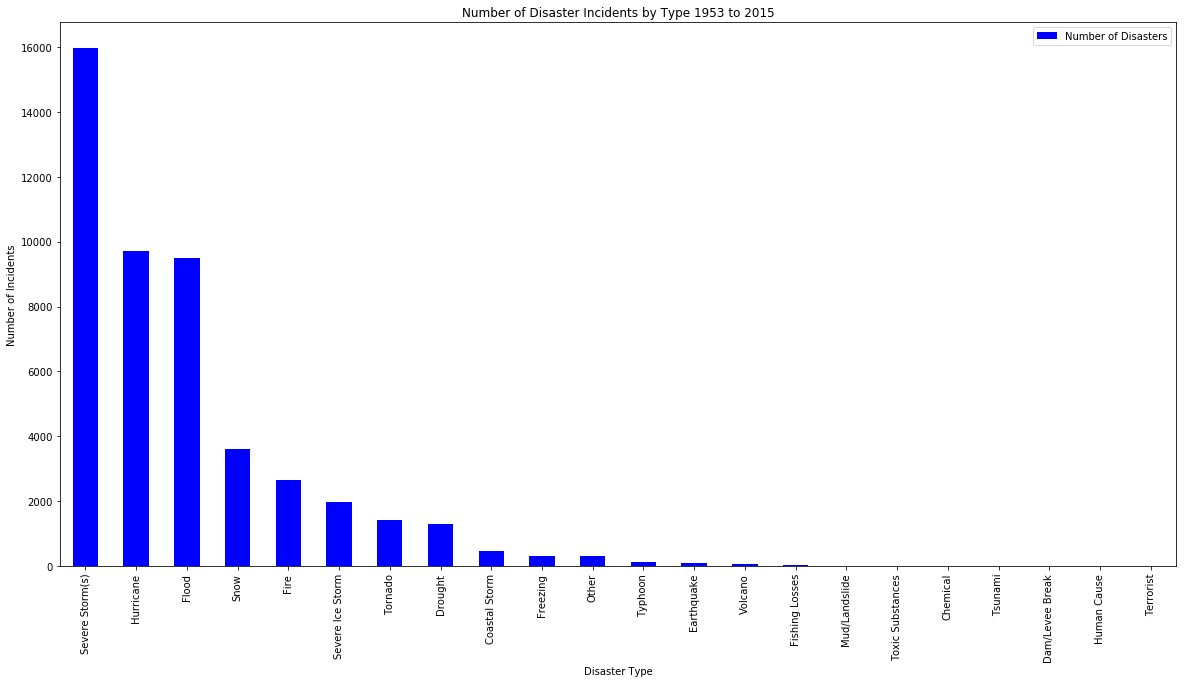

In [62]:
#Number of disasters type VS Disaster types (Bar Graph), 1953-2015.

incident_types.plot(kind="bar", facecolor="blue", figsize=(20,10))
plt.title("Number of Disaster Incidents by Type 1953 to 2015")
plt.xlabel("Disaster Type")
plt.ylabel("Number of Incidents")
plt.show()

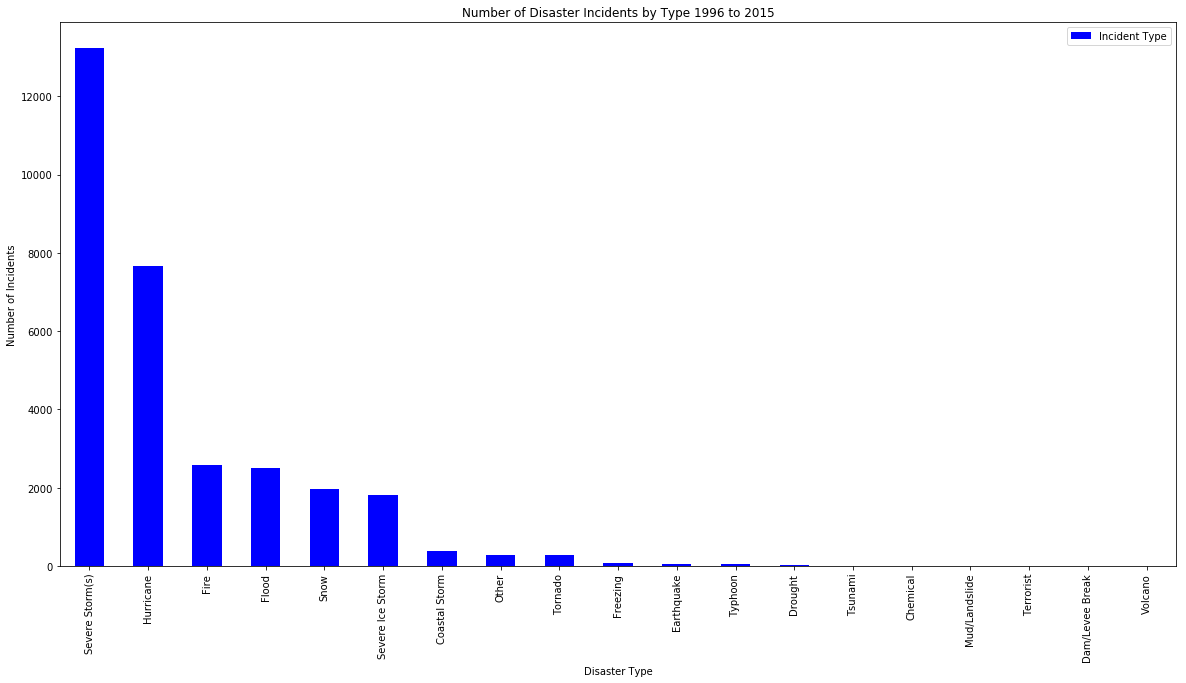

In [63]:
incident_types_1996_2017.plot(kind="bar",facecolor="blue", figsize=(20,10))
plt.title("Number of Disaster Incidents by Type 1996 to 2015")
plt.xlabel("Disaster Type")
plt.ylabel("Number of Incidents")
plt.show()

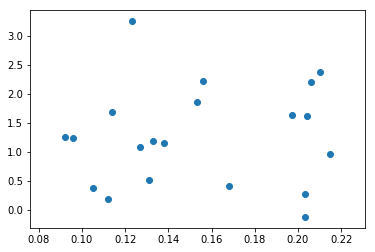

In [68]:
plt.scatter(precip["Index value"],temp_1996_2015_data["Temperature anomaly"])
plt.show()